# CISC7201 Group E - Crimes in Chicago
Group Members:
* CHEONG CHI MENG - MB95544
* LEI HOI WAI - MB95557
* SU SIO TONG - MB95555

# 0. Data Set Introducation
* Source Origin: Chicago Data Portal ([Download from Kaggle](https://www.kaggle.com/currie32/crimes-in-chicago#Chicago_Crimes_2012_to_2017.csv))
* Format: CSV
* Data set Size: 368.3MB
* Columns: 23columns
* Num. Records: 1,456,714

# 1. Importing libraries & Reading data
Library used:
1. Pandas: for data processing
2. Matplotlib: for graph plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

chicago=pd.read_csv('./Chicago_Crimes_2012_to_2017.csv')
chicago.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


# 2. Data preprocessing
We're going to investage the features(Columns) of the data set in this section.

## 2.1  Dropping unuseful columns
Some irrelevant data which is not useful to explain the target can be dropped out. Let's look into the columns.

In [2]:
chicago.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [3]:
chicago.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

There are 23 columns.
Since our analysis focus much on the time, nature of crimes, and location (Latitude, Longitude) etc, we can conclude that two categoies of coloums can be removed:
* Pure unnecessary features: "Unname ID" is no meaning and duplicate with column "ID", similar example to "Year" and "Date"
* Weak feature: non useful informational features such as "case number","FBI code","IUC","Block" etc.. and some irrelevant features with of analysis object such as "Community Area".

In [4]:
newchicago=chicago.drop(['Block','IUCR','Beat','District','Ward','FBI Code',
    'X Coordinate', 'Y Coordinate','Updated On', 'Location','Case Number','Unnamed: 0','Community Area','Year'], axis=1)

In [5]:
#Test after dropping columns
newchicago.head(5)

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
0,10508693,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819
1,10508695,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363
2,10508697,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372
3,10508698,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516
4,10508699,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751


## 2.2 Dealing with missing values

The info table shows that 10 columns having equal number of row. However, there are 1,658 missing values in "Location Description " columns . And 37,083 missing values in the "Latitue' and "Longitude" columns.  
Comparing with the total 1,456,714 rows , it is only 0.113% and 2.5% of the total that not easy to affect the final finding. So we decide to use "Drop Null Values" methold to clean the rows in order to make the data set consistence.  

In [6]:
newchicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 9 columns):
ID                      1456714 non-null int64
Date                    1456714 non-null object
Primary Type            1456714 non-null object
Description             1456714 non-null object
Location Description    1455056 non-null object
Arrest                  1456714 non-null bool
Domestic                1456714 non-null bool
Latitude                1419631 non-null float64
Longitude               1419631 non-null float64
dtypes: bool(2), float64(2), int64(1), object(4)
memory usage: 80.6+ MB


In [7]:
newchicago['Location Description'].isnull().sum() # or use isnull.values.any()

1658

In [8]:
newchicago['Latitude'].isnull().sum() 

37083

In [9]:
newchicago['Longitude'].isnull().sum()

37083

In [10]:
newchicago=newchicago.dropna()

In [11]:
newchicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418405 entries, 0 to 1456713
Data columns (total 9 columns):
ID                      1418405 non-null int64
Date                    1418405 non-null object
Primary Type            1418405 non-null object
Description             1418405 non-null object
Location Description    1418405 non-null object
Arrest                  1418405 non-null bool
Domestic                1418405 non-null bool
Latitude                1418405 non-null float64
Longitude               1418405 non-null float64
dtypes: bool(2), float64(2), int64(1), object(4)
memory usage: 89.3+ MB


## 2.3 Re-indexing: Set "ID" as index
Check whether there're duplicate values in column "ID". Make "ID" column as index if all values are unique.


In [12]:
# Check is there any duplicated values in ID coloums, make sure the uniqueness 
newchicago['ID'].duplicated().sum()

0

In [13]:
newchicago=newchicago.set_index('ID')

In [14]:
newchicago.head(5)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Latitude,Longitude
ID,,,,,,,,
10508693,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819
10508695,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363
10508697,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372
10508698,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516
10508699,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751


## 2.4 Rename columns with meaningful words

In [15]:
newchicago.rename(columns={'Primary Type':'Crime Type','Description':'Crime Description','Domestic':'Domestic Violence Related'},inplace=True)

In [16]:
newchicago.head()

,Date,Crime Type,Crime Description,Location Description,Arrest,Domestic Violence Related,Latitude,Longitude
ID,,,,,,,,
10508693,05/03/2016 11:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819
10508695,05/03/2016 09:40:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363
10508697,05/03/2016 11:31:00 PM,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372
10508698,05/03/2016 10:10:00 PM,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516
10508699,05/03/2016 10:00:00 PM,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751


## 2.5 Change the data type of the "Date" column

Change the "object" data type of the "Date" column to "Datetime".

In [17]:
newchicago['Date'].dtype

dtype('O')

In [18]:
#newchicago['Date'] = pd.to_datetime(newchicago['Date'])
import datetime 
#plan B: newchicago['date_parsed'] = pd.to_datetime(newchicago['Date'], format = "%m/%d/%Y", errors='coerce')

newchicago['Date']=pd.to_datetime(newchicago['Date'])

In [19]:
newchicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418405 entries, 10508693 to 10508692
Data columns (total 8 columns):
Date                         1418405 non-null datetime64[ns]
Crime Type                   1418405 non-null object
Crime Description            1418405 non-null object
Location Description         1418405 non-null object
Arrest                       1418405 non-null bool
Domestic Violence Related    1418405 non-null bool
Latitude                     1418405 non-null float64
Longitude                    1418405 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(2), object(3)
memory usage: 78.5+ MB


In [20]:
#SORTING BY "DATE" 
newchicago.sort_values(by='Date', ascending=True)

,Date,Crime Type,Crime Description,Location Description,Arrest,Domestic Violence Related,Latitude,Longitude
ID,,,,,,,,
8429628,2012-01-01 00:00:00,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,41.746546,-87.643922
8422712,2012-01-01 00:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,False,41.733290,-87.549947
8421937,2012-01-01 00:00:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.760257,-87.697801
8660003,2012-01-01 00:00:00,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,41.951980,-87.646514
8692747,2012-01-01 00:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,41.729470,-87.679883
8767215,2012-01-01 00:00:00,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,41.908336,-87.753461
8647985,2012-01-01 00:00:00,CRIMINAL DAMAGE,CRIMINAL DEFACEMENT,RESIDENCE-GARAGE,False,False,41.909297,-87.689654
8605156,2012-01-01 00:00:00,THEFT,OVER $500,STREET,False,False,41.914413,-87.692214
9163847,2012-01-01 00:00:00,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,41.760455,-87.679356


## 2.6 Final checking

In [21]:
#Checking
newchicago.head()

,Date,Crime Type,Crime Description,Location Description,Arrest,Domestic Violence Related,Latitude,Longitude
ID,,,,,,,,
10508693,2016-05-03 23:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.864073,-87.706819
10508695,2016-05-03 21:40:00,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,41.782922,-87.604363
10508697,2016-05-03 23:31:00,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,41.894908,-87.758372
10508698,2016-05-03 22:10:00,BATTERY,SIMPLE,SIDEWALK,False,False,41.885687,-87.749516
10508699,2016-05-03 22:00:00,THEFT,$500 AND UNDER,RESIDENCE,False,True,41.886297,-87.761751


In [22]:
#Check
newchicago.tail()

,Date,Crime Type,Crime Description,Location Description,Arrest,Domestic Violence Related,Latitude,Longitude
ID,,,,,,,,
10508679,2016-05-03 23:33:00,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,41.849222,-87.691556
10508680,2016-05-03 23:30:00,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,41.760744,-87.633335
10508681,2016-05-03 00:15:00,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,41.779235,-87.685207
10508690,2016-05-03 21:07:00,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,41.745252,-87.552773
10508692,2016-05-03 23:38:00,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False,41.758309,-87.620658


In [23]:
#Check by samples
newchicago.Date.sample(10)

ID
8675519    2012-06-24 13:57:00
9437367    2013-12-23 10:30:00
8576607    2012-04-20 13:30:00
8543113    2012-03-29 00:10:00
9194647    2013-06-25 17:00:00
9510299    2014-02-14 12:00:00
10703868   2016-10-03 20:10:00
10545535   2016-06-02 13:58:00
9540610    2014-03-21 17:10:00
9676088    2014-07-01 09:20:00
Name: Date, dtype: datetime64[ns]

In [24]:
#Check by Datetime function
newchicago.Date.min()

Timestamp('2012-01-01 00:00:00')

In [25]:
#Check by Datetime function
newchicago.Date.max()

Timestamp('2017-01-18 10:12:00')

# 3. Plotting Graphs
## 3.1 Crime Frequency analysis in 2012-2016

In [26]:
df_frequency = newchicago['Crime Type'].value_counts().to_frame().reset_index()
df_frequency.columns = ["Crime Type","Frequency"]
df_frequency.sort_values('Frequency',inplace=True, ascending=False)
df_frequency

,Crime Type,Frequency
0,THEFT,321960
1,BATTERY,258944
2,CRIMINAL DAMAGE,152816
3,NARCOTICS,131184
4,ASSAULT,89512
5,OTHER OFFENSE,85361
6,BURGLARY,81671
7,DECEPTIVE PRACTICE,67611
8,MOTOR VEHICLE THEFT,59858
9,ROBBERY,56093


There are total  33  type of Crime:


Text(0, 0.5, 'Crime Type')

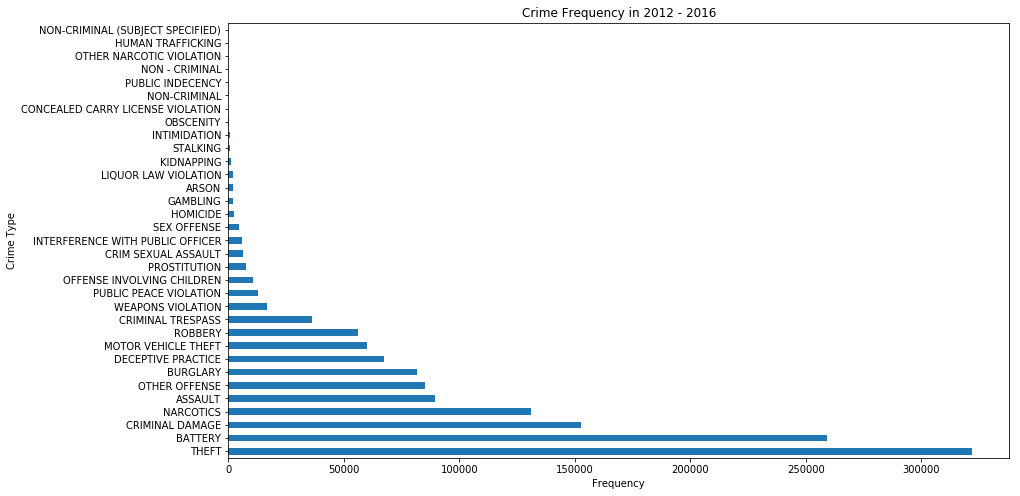

In [27]:
print("There are total ",newchicago["Crime Type"].nunique()," type of Crimes:")
fig01 = newchicago["Crime Type"].value_counts().plot(kind='barh',
                                               figsize=(14,8),
                                               title='Crime Frequency in 2012 - 2016')
fig01.set_xlabel("Frequency")
fig01.set_ylabel("Crime Type")

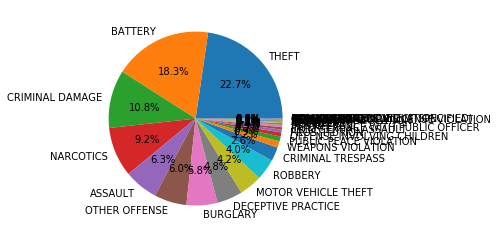

In [28]:
fig02 = plt.pie(df_frequency["Frequency"] ,
        labels = df_frequency["Crime Type"],
        autopct='%1.1f%%',
        ) 

**We found that there are to many items for exporting a pie chart, so we decided to show only the top seven types of crime, and the rest we group to "Others".**

In [29]:
df_temp01 = df_frequency[:7].copy()
df_temp02 = pd.DataFrame(data = {"Crime Type":["Others"],"Frequency":[df_frequency["Frequency"][7:].sum()]})
df_temp03 = pd.concat([df_temp01,df_temp02])
df_temp03

,Crime Type,Frequency
0,THEFT,321960
1,BATTERY,258944
2,CRIMINAL DAMAGE,152816
3,NARCOTICS,131184
4,ASSAULT,89512
5,OTHER OFFENSE,85361
6,BURGLARY,81671
0,Others,296957


**Here we test whether the total frequency of new dataframe equals to the original one or not:**

In [30]:
print(df_temp03["Frequency"].sum() == df_frequency["Frequency"].sum())

True


**Eventually we got the below new pie chart:**

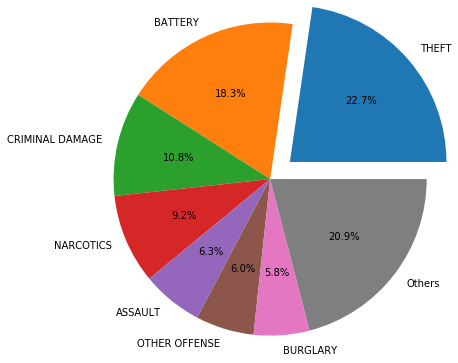

In [31]:
fig03 = plt.pie(df_temp03["Frequency"] ,
        explode=(0.3,0,0,0,0,0,0,0),
        labels = df_temp03["Crime Type"],
        autopct='%1.1f%%',
        radius=1.8,
       )

**As the "THEFT" is the most frequent crime type, we would take more analysis on it:**

In [32]:
df_theft = newchicago.loc[newchicago["Crime Type"] == "THEFT"]

dftemp = df_theft.copy()
dftemp["Date"] = df_theft["Date"].astype("datetime64[ns]")
dftemp["Year"] = dftemp.Date.dt.year

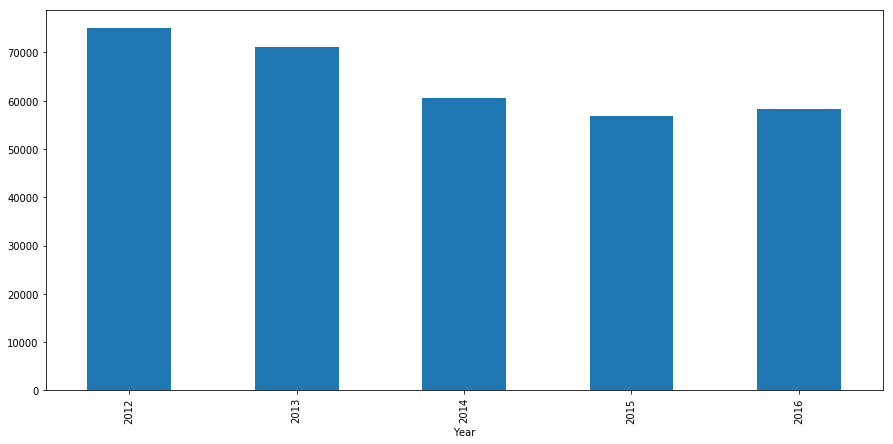

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
dftemp.groupby("Year").count()['Date'].plot.bar(ax=ax)

**The figure above shows that the "Theft" case is trending down from 2012 to 2016.**

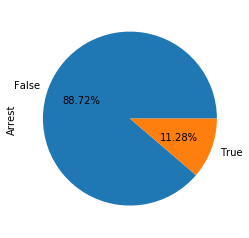

In [34]:
counts = df_theft['Arrest'].value_counts()
counts.plot.pie(autopct='%.2f%%')
plt.show()

**The figure above shows that only 11.28% of the suspects in "Theft" cases have been arrested.**

## 3.2 Location distribution
### Step1 - Clean the points that not in the range of Chicago:
* 41.6339 < lat < 42.0340
* -87.3564 < long < -88.1049

In [35]:
cleanchicago = newchicago.drop(
    newchicago[~(
        (41.6339 < newchicago.Latitude) & (newchicago.Latitude < 42.0340) & 
        (-88.1049 < newchicago.Longitude) & (newchicago.Longitude < -87.3564)
    )].index)
print('Cleaned', len(newchicago)-len(cleanchicago), 'records.')

Cleaned 77 records.


### Step 2 - Get the map range in order to download the map as the graph background.

In [36]:
print('MinLat:',cleanchicago.Latitude.min())
print('MaxLat:',cleanchicago.Latitude.max())
print('MinLog:',cleanchicago.Longitude.min())
print('MaxLog:',cleanchicago.Longitude.max())
mapBoundary = ((cleanchicago.Longitude.min(), cleanchicago.Longitude.max(), cleanchicago.Latitude.min(), cleanchicago.Latitude.max()))

MinLat: 41.644585429
MaxLat: 42.022709624
MinLog: -87.934324301
MaxLog: -87.524529378


### Step3 - Get the map from [Open Stree Map](https://www.openstreetmap.org) by using the info. in prev. step, and read into the program

In [37]:
chicagoMap = plt.imread('ChicagoMap.png')

### Step4 - Choose 2 Crime types that are most dangerous to human body: Battery & Weapons Violation

In [40]:
BATTERY = cleanchicago[(cleanchicago['Crime Type'] == 'BATTERY')]
WEAPONS_VIOLATION = cleanchicago[(cleanchicago['Crime Type'] == 'WEAPONS VIOLATION')]

258928
16982


### Step5 - Plot the map graphs
As we can see in the graphs, the places in deep color means that "Battery"(Blue) & "Weapons violation"(Red) happens frequently.

<Figure size 432x288 with 0 Axes>

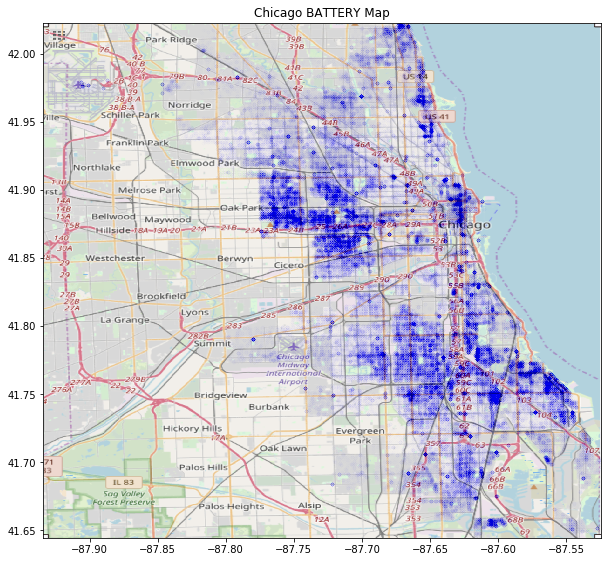

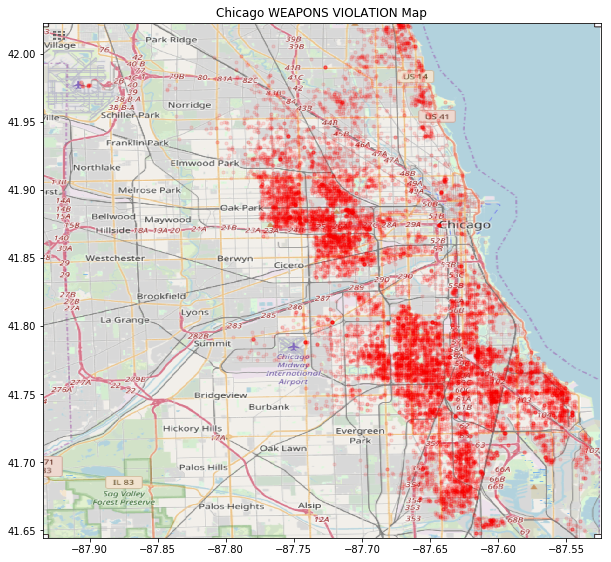

In [39]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(BATTERY.Longitude, BATTERY.Latitude, zorder=1, alpha= 0.002, c='b', s=10)
ax.set_title('Chicago BATTERY Map')
ax.set_xlim(mapBoundary[0],mapBoundary[1])
ax.set_ylim(mapBoundary[2],mapBoundary[3])

fig2, ax2 = plt.subplots(figsize=(10,10))
ax2.set_title('Chicago WEAPONS VIOLATION Map')
#ax2 = ax.twinx().twiny()

ax2.scatter(WEAPONS_VIOLATION.Longitude, WEAPONS_VIOLATION.Latitude, zorder=1, alpha= 0.1, c='r', s=10)

#plt.imshow(chicagoMap, extent = mapBoundary, aspect= 'equal')
ax.imshow(chicagoMap, zorder=0, extent = mapBoundary, aspect= 'equal')
ax2.imshow(chicagoMap, zorder=0, extent = mapBoundary, aspect= 'equal')

# 4. Conclusion
1. Data preprocessing job:
    * Dropping unuseful columns
    * Dealing with missing values
    * Re-indexing
    * Rename columns with meaningful words
    * Change the data type of the "Date" column
2. Data analysis & findings
    * Top 7 crimes are(in order): THEFT, BATTERY, CRIMINAL DAMAGE, NARCOTICS, ASSAULT, OTHER OFFENSE, BURGLARY
    * "Theft" crimes is trending down from 2012 to 2016.
    * Only 11.28% of the suspects in "Theft" cases have been arrested.
    * "Battery" & "Weapons violation" crime geo distribution in Chicago.